# MPGCN Playground Pipeline

In [1]:
import os
import yaml
import numpy as np
import torch
import pickle
from types import SimpleNamespace
from src.reader import Playground_Reader
from src.dataset import create as create_dataset
from src.model.MPGCN import MPGCN

# IMPORTANT:
# Run the Workdir Cleanup BEFORE running reader.start()
# because camera IDs require regenerating folds.

def to_ns(d):
    if isinstance(d, dict):
        return SimpleNamespace(**{k: to_ns(v) for k, v in d.items()})
    elif isinstance(d, list):
        return [to_ns(x) for x in d]
    return d

def resolve_path(path: str):
    if path.startswith("./"):
        base = os.path.abspath(".")
        return os.path.join(base, path[2:])
    return path

### ⚠️ Careful, this removes the splits from ./workdir DO NOT RUN if you are not regenerating the folds

In [2]:
import shutil

workdir_path = "./workdir"

if os.path.exists(workdir_path) and os.path.isdir(workdir_path):
    for item in os.listdir(workdir_path):
        item_path = os.path.join(workdir_path, item)
        try:
            if os.path.isdir(item_path):
                shutil.rmtree(item_path)
            else:
                os.remove(item_path)
            print(f"Removed: {item}")
        except Exception as e:
            print(f"Error removing {item}: {e}")
    print("Workdir cleanup complete!")
else:
    print("./workdir directory not found or is not a directory")

Removed: fold_07_train.txt
Removed: fold_13_train.txt
Removed: fold_01_eval.txt
Removed: fold_00_eval.txt
Removed: fold_summary.json
Removed: fold_20_train.txt
Removed: fold_19
Removed: fold_16_eval.txt
Removed: fold_17_eval.txt
Removed: fold_21
Removed: fold_01_train.txt
Removed: fold_17
Removed: fold_15_train.txt
Removed: fold_10
Removed: fold_22_eval.txt
Removed: fold_23_eval.txt
Removed: fold_11
Removed: fold_16
Removed: fold_20
Removed: fold_18_train.txt
Removed: fold_18
Removed: fold_05
Removed: fold_02
Removed: fold_12_train.txt
Removed: fold_06_train.txt
Removed: fold_11_eval.txt
Removed: fold_10_eval.txt
Removed: fold_summary_actual.json
Removed: fold_24_eval.txt
Removed: fold_03
Removed: fold_04
Removed: fold_21_train.txt
Removed: fold_14_train.txt
Removed: fold_06_eval.txt
Removed: fold_07_eval.txt
Removed: fold_00_train.txt
Removed: fold_19_train.txt
Removed: fold_24_train.txt
Removed: fold_21_eval.txt
Removed: fold_20_eval.txt
Removed: fold_05_train.txt
Removed: fold_11_tr

## Reader GENDATA (Run only once if no files in ./workdir or tensor shapes change)

In [3]:
gendata_yaml_path = "./config/playground_gendata.yaml"
with open(gendata_yaml_path, "r") as f:
    gendata_cfg = yaml.safe_load(f)

dataset_args = gendata_cfg["dataset_args"]

dataset_args["dataset_root_folder"] = resolve_path(dataset_args["dataset_root_folder"])
dataset_args["out_folder"] = resolve_path(dataset_args["out_folder"])

print("Root folder resolved →", dataset_args["dataset_root_folder"])
print("Output folder resolved →", dataset_args["out_folder"])

reader = Playground_Reader(
    dataset_root_folder=dataset_args["dataset_root_folder"],
    out_folder=dataset_args["out_folder"],
    label_csv_path="./data/processed/mpgcn_labels.csv",
    num_frame=dataset_args["num_frame"],
)
reader.start()

# Choose a fold to train
FOLD_ID = 0
fold_dir = f"{dataset_args['out_folder']}/fold_{FOLD_ID:02d}"

train_data_path = os.path.join(fold_dir, "train_data.npy")
train_obj_path = os.path.join(fold_dir, "train_object_data.npy")
train_label_path = os.path.join(fold_dir, "train_label.pkl")

eval_data_path = os.path.join(fold_dir, "eval_data.npy")
eval_obj_path = os.path.join(fold_dir, "eval_object_data.npy")
eval_label_path = os.path.join(fold_dir, "eval_label.pkl")

cam_path = os.path.join(fold_dir, "train_camera.npy")
print("Camera file exists:", os.path.exists(cam_path))
print("Using fold:", fold_dir)

Root folder resolved → /Users/alexeidelgado/Desktop/mpgcn-playground-scenes/data/npy
Output folder resolved → /Users/alexeidelgado/Desktop/mpgcn-playground-scenes/workdir
Starting dataset build from CSV with repeated stratified K-folds...

=== FILE DISCOVERY ===
Found 1146 pose files in /Users/alexeidelgado/Desktop/mpgcn-playground-scenes/data/npy
✅ All pose files have at least one matching object file.

Generating fold 00 splits...


Scanning object files in /Users/alexeidelgado/Desktop/mpgcn-playground-scenes/data/npy: 100%|██████████| 1146/1146 [00:00<00:00, 17622.29it/s]


Max number of object nodes in /Users/alexeidelgado/Desktop/mpgcn-playground-scenes/data/npy: 4
Using n_obj_max = 4


100%|██████████| 1146/1146 [00:00<00:00, 4651.96it/s]


Unique object shapes found for fold 00 train: {(48, 4, 3)}
Train set saved → /Users/alexeidelgado/Desktop/mpgcn-playground-scenes/workdir/fold_00
Unique object shapes found for fold 00 eval: {(48, 4, 3)}
Eval set saved → /Users/alexeidelgado/Desktop/mpgcn-playground-scenes/workdir/fold_00

=== FILE DISCOVERY ===
Found 1146 pose files in /Users/alexeidelgado/Desktop/mpgcn-playground-scenes/data/npy
✅ All pose files have at least one matching object file.

Generating fold 01 splits...


Scanning object files in /Users/alexeidelgado/Desktop/mpgcn-playground-scenes/data/npy: 100%|██████████| 1146/1146 [00:00<00:00, 20820.45it/s]


Max number of object nodes in /Users/alexeidelgado/Desktop/mpgcn-playground-scenes/data/npy: 4
Using n_obj_max = 4


100%|██████████| 1146/1146 [00:00<00:00, 5179.83it/s]


Unique object shapes found for fold 01 train: {(48, 4, 3)}
Train set saved → /Users/alexeidelgado/Desktop/mpgcn-playground-scenes/workdir/fold_01
Unique object shapes found for fold 01 eval: {(48, 4, 3)}
Eval set saved → /Users/alexeidelgado/Desktop/mpgcn-playground-scenes/workdir/fold_01

=== FILE DISCOVERY ===
Found 1146 pose files in /Users/alexeidelgado/Desktop/mpgcn-playground-scenes/data/npy
✅ All pose files have at least one matching object file.

Generating fold 02 splits...


Scanning object files in /Users/alexeidelgado/Desktop/mpgcn-playground-scenes/data/npy: 100%|██████████| 1146/1146 [00:00<00:00, 23433.58it/s]


Max number of object nodes in /Users/alexeidelgado/Desktop/mpgcn-playground-scenes/data/npy: 4
Using n_obj_max = 4


100%|██████████| 1146/1146 [00:00<00:00, 4796.06it/s]


Unique object shapes found for fold 02 train: {(48, 4, 3)}
Train set saved → /Users/alexeidelgado/Desktop/mpgcn-playground-scenes/workdir/fold_02
Unique object shapes found for fold 02 eval: {(48, 4, 3)}
Eval set saved → /Users/alexeidelgado/Desktop/mpgcn-playground-scenes/workdir/fold_02

=== FILE DISCOVERY ===
Found 1146 pose files in /Users/alexeidelgado/Desktop/mpgcn-playground-scenes/data/npy
✅ All pose files have at least one matching object file.

Generating fold 03 splits...


Scanning object files in /Users/alexeidelgado/Desktop/mpgcn-playground-scenes/data/npy: 100%|██████████| 1146/1146 [00:00<00:00, 9909.97it/s]


Max number of object nodes in /Users/alexeidelgado/Desktop/mpgcn-playground-scenes/data/npy: 4
Using n_obj_max = 4


100%|██████████| 1146/1146 [00:00<00:00, 4975.72it/s]


Unique object shapes found for fold 03 train: {(48, 4, 3)}
Train set saved → /Users/alexeidelgado/Desktop/mpgcn-playground-scenes/workdir/fold_03
Unique object shapes found for fold 03 eval: {(48, 4, 3)}
Eval set saved → /Users/alexeidelgado/Desktop/mpgcn-playground-scenes/workdir/fold_03

=== FILE DISCOVERY ===
Found 1146 pose files in /Users/alexeidelgado/Desktop/mpgcn-playground-scenes/data/npy
✅ All pose files have at least one matching object file.

Generating fold 04 splits...


Scanning object files in /Users/alexeidelgado/Desktop/mpgcn-playground-scenes/data/npy: 100%|██████████| 1146/1146 [00:00<00:00, 23084.81it/s]


Max number of object nodes in /Users/alexeidelgado/Desktop/mpgcn-playground-scenes/data/npy: 4
Using n_obj_max = 4


100%|██████████| 1146/1146 [00:00<00:00, 5042.84it/s]


Unique object shapes found for fold 04 train: {(48, 4, 3)}
Train set saved → /Users/alexeidelgado/Desktop/mpgcn-playground-scenes/workdir/fold_04
Unique object shapes found for fold 04 eval: {(48, 4, 3)}
Eval set saved → /Users/alexeidelgado/Desktop/mpgcn-playground-scenes/workdir/fold_04

=== FILE DISCOVERY ===
Found 1146 pose files in /Users/alexeidelgado/Desktop/mpgcn-playground-scenes/data/npy
✅ All pose files have at least one matching object file.

Generating fold 05 splits...


Scanning object files in /Users/alexeidelgado/Desktop/mpgcn-playground-scenes/data/npy: 100%|██████████| 1146/1146 [00:00<00:00, 22176.11it/s]


Max number of object nodes in /Users/alexeidelgado/Desktop/mpgcn-playground-scenes/data/npy: 4
Using n_obj_max = 4


100%|██████████| 1146/1146 [00:00<00:00, 4936.52it/s]


Unique object shapes found for fold 05 train: {(48, 4, 3)}
Train set saved → /Users/alexeidelgado/Desktop/mpgcn-playground-scenes/workdir/fold_05
Unique object shapes found for fold 05 eval: {(48, 4, 3)}
Eval set saved → /Users/alexeidelgado/Desktop/mpgcn-playground-scenes/workdir/fold_05

=== FILE DISCOVERY ===
Found 1146 pose files in /Users/alexeidelgado/Desktop/mpgcn-playground-scenes/data/npy
✅ All pose files have at least one matching object file.

Generating fold 06 splits...


Scanning object files in /Users/alexeidelgado/Desktop/mpgcn-playground-scenes/data/npy: 100%|██████████| 1146/1146 [00:00<00:00, 22811.47it/s]


Max number of object nodes in /Users/alexeidelgado/Desktop/mpgcn-playground-scenes/data/npy: 4
Using n_obj_max = 4


100%|██████████| 1146/1146 [00:00<00:00, 5027.26it/s]


Unique object shapes found for fold 06 train: {(48, 4, 3)}
Train set saved → /Users/alexeidelgado/Desktop/mpgcn-playground-scenes/workdir/fold_06
Unique object shapes found for fold 06 eval: {(48, 4, 3)}
Eval set saved → /Users/alexeidelgado/Desktop/mpgcn-playground-scenes/workdir/fold_06

=== FILE DISCOVERY ===
Found 1146 pose files in /Users/alexeidelgado/Desktop/mpgcn-playground-scenes/data/npy
✅ All pose files have at least one matching object file.

Generating fold 07 splits...


Scanning object files in /Users/alexeidelgado/Desktop/mpgcn-playground-scenes/data/npy: 100%|██████████| 1146/1146 [00:00<00:00, 21396.56it/s]


Max number of object nodes in /Users/alexeidelgado/Desktop/mpgcn-playground-scenes/data/npy: 4
Using n_obj_max = 4


100%|██████████| 1146/1146 [00:00<00:00, 4784.07it/s]


Unique object shapes found for fold 07 train: {(48, 4, 3)}
Train set saved → /Users/alexeidelgado/Desktop/mpgcn-playground-scenes/workdir/fold_07
Unique object shapes found for fold 07 eval: {(48, 4, 3)}
Eval set saved → /Users/alexeidelgado/Desktop/mpgcn-playground-scenes/workdir/fold_07

=== FILE DISCOVERY ===
Found 1146 pose files in /Users/alexeidelgado/Desktop/mpgcn-playground-scenes/data/npy
✅ All pose files have at least one matching object file.

Generating fold 08 splits...


Scanning object files in /Users/alexeidelgado/Desktop/mpgcn-playground-scenes/data/npy: 100%|██████████| 1146/1146 [00:00<00:00, 22616.12it/s]


Max number of object nodes in /Users/alexeidelgado/Desktop/mpgcn-playground-scenes/data/npy: 4
Using n_obj_max = 4


100%|██████████| 1146/1146 [00:00<00:00, 4825.16it/s]


Unique object shapes found for fold 08 train: {(48, 4, 3)}
Train set saved → /Users/alexeidelgado/Desktop/mpgcn-playground-scenes/workdir/fold_08
Unique object shapes found for fold 08 eval: {(48, 4, 3)}
Eval set saved → /Users/alexeidelgado/Desktop/mpgcn-playground-scenes/workdir/fold_08

=== FILE DISCOVERY ===
Found 1146 pose files in /Users/alexeidelgado/Desktop/mpgcn-playground-scenes/data/npy
✅ All pose files have at least one matching object file.

Generating fold 09 splits...


Scanning object files in /Users/alexeidelgado/Desktop/mpgcn-playground-scenes/data/npy: 100%|██████████| 1146/1146 [00:00<00:00, 22274.46it/s]


Max number of object nodes in /Users/alexeidelgado/Desktop/mpgcn-playground-scenes/data/npy: 4
Using n_obj_max = 4


100%|██████████| 1146/1146 [00:00<00:00, 5034.71it/s]


Unique object shapes found for fold 09 train: {(48, 4, 3)}
Train set saved → /Users/alexeidelgado/Desktop/mpgcn-playground-scenes/workdir/fold_09
Unique object shapes found for fold 09 eval: {(48, 4, 3)}
Eval set saved → /Users/alexeidelgado/Desktop/mpgcn-playground-scenes/workdir/fold_09

=== FILE DISCOVERY ===
Found 1146 pose files in /Users/alexeidelgado/Desktop/mpgcn-playground-scenes/data/npy
✅ All pose files have at least one matching object file.

Generating fold 10 splits...


Scanning object files in /Users/alexeidelgado/Desktop/mpgcn-playground-scenes/data/npy: 100%|██████████| 1146/1146 [00:00<00:00, 22609.21it/s]


Max number of object nodes in /Users/alexeidelgado/Desktop/mpgcn-playground-scenes/data/npy: 4
Using n_obj_max = 4


100%|██████████| 1146/1146 [00:00<00:00, 5167.40it/s]


Unique object shapes found for fold 10 train: {(48, 4, 3)}
Train set saved → /Users/alexeidelgado/Desktop/mpgcn-playground-scenes/workdir/fold_10
Unique object shapes found for fold 10 eval: {(48, 4, 3)}
Eval set saved → /Users/alexeidelgado/Desktop/mpgcn-playground-scenes/workdir/fold_10

=== FILE DISCOVERY ===
Found 1146 pose files in /Users/alexeidelgado/Desktop/mpgcn-playground-scenes/data/npy
✅ All pose files have at least one matching object file.

Generating fold 11 splits...


Scanning object files in /Users/alexeidelgado/Desktop/mpgcn-playground-scenes/data/npy: 100%|██████████| 1146/1146 [00:00<00:00, 22866.38it/s]


Max number of object nodes in /Users/alexeidelgado/Desktop/mpgcn-playground-scenes/data/npy: 4
Using n_obj_max = 4


100%|██████████| 1146/1146 [00:00<00:00, 5192.59it/s]


Unique object shapes found for fold 11 train: {(48, 4, 3)}
Train set saved → /Users/alexeidelgado/Desktop/mpgcn-playground-scenes/workdir/fold_11
Unique object shapes found for fold 11 eval: {(48, 4, 3)}
Eval set saved → /Users/alexeidelgado/Desktop/mpgcn-playground-scenes/workdir/fold_11

=== FILE DISCOVERY ===
Found 1146 pose files in /Users/alexeidelgado/Desktop/mpgcn-playground-scenes/data/npy
✅ All pose files have at least one matching object file.

Generating fold 12 splits...


Scanning object files in /Users/alexeidelgado/Desktop/mpgcn-playground-scenes/data/npy: 100%|██████████| 1146/1146 [00:00<00:00, 23512.90it/s]


Max number of object nodes in /Users/alexeidelgado/Desktop/mpgcn-playground-scenes/data/npy: 4
Using n_obj_max = 4


100%|██████████| 1146/1146 [00:00<00:00, 4785.54it/s]


Unique object shapes found for fold 12 train: {(48, 4, 3)}
Train set saved → /Users/alexeidelgado/Desktop/mpgcn-playground-scenes/workdir/fold_12
Unique object shapes found for fold 12 eval: {(48, 4, 3)}
Eval set saved → /Users/alexeidelgado/Desktop/mpgcn-playground-scenes/workdir/fold_12

=== FILE DISCOVERY ===
Found 1146 pose files in /Users/alexeidelgado/Desktop/mpgcn-playground-scenes/data/npy
✅ All pose files have at least one matching object file.

Generating fold 13 splits...


Scanning object files in /Users/alexeidelgado/Desktop/mpgcn-playground-scenes/data/npy: 100%|██████████| 1146/1146 [00:00<00:00, 22748.09it/s]


Max number of object nodes in /Users/alexeidelgado/Desktop/mpgcn-playground-scenes/data/npy: 4
Using n_obj_max = 4


100%|██████████| 1146/1146 [00:00<00:00, 4948.98it/s]


Unique object shapes found for fold 13 train: {(48, 4, 3)}
Train set saved → /Users/alexeidelgado/Desktop/mpgcn-playground-scenes/workdir/fold_13
Unique object shapes found for fold 13 eval: {(48, 4, 3)}
Eval set saved → /Users/alexeidelgado/Desktop/mpgcn-playground-scenes/workdir/fold_13

=== FILE DISCOVERY ===
Found 1146 pose files in /Users/alexeidelgado/Desktop/mpgcn-playground-scenes/data/npy
✅ All pose files have at least one matching object file.

Generating fold 14 splits...


Scanning object files in /Users/alexeidelgado/Desktop/mpgcn-playground-scenes/data/npy: 100%|██████████| 1146/1146 [00:00<00:00, 22858.22it/s]


Max number of object nodes in /Users/alexeidelgado/Desktop/mpgcn-playground-scenes/data/npy: 4
Using n_obj_max = 4


100%|██████████| 1146/1146 [00:00<00:00, 4998.39it/s]


Unique object shapes found for fold 14 train: {(48, 4, 3)}
Train set saved → /Users/alexeidelgado/Desktop/mpgcn-playground-scenes/workdir/fold_14
Unique object shapes found for fold 14 eval: {(48, 4, 3)}
Eval set saved → /Users/alexeidelgado/Desktop/mpgcn-playground-scenes/workdir/fold_14

=== FILE DISCOVERY ===
Found 1146 pose files in /Users/alexeidelgado/Desktop/mpgcn-playground-scenes/data/npy
✅ All pose files have at least one matching object file.

Generating fold 15 splits...


Scanning object files in /Users/alexeidelgado/Desktop/mpgcn-playground-scenes/data/npy: 100%|██████████| 1146/1146 [00:00<00:00, 21972.66it/s]


Max number of object nodes in /Users/alexeidelgado/Desktop/mpgcn-playground-scenes/data/npy: 4
Using n_obj_max = 4


100%|██████████| 1146/1146 [00:00<00:00, 4789.77it/s]


Unique object shapes found for fold 15 train: {(48, 4, 3)}
Train set saved → /Users/alexeidelgado/Desktop/mpgcn-playground-scenes/workdir/fold_15
Unique object shapes found for fold 15 eval: {(48, 4, 3)}
Eval set saved → /Users/alexeidelgado/Desktop/mpgcn-playground-scenes/workdir/fold_15

=== FILE DISCOVERY ===
Found 1146 pose files in /Users/alexeidelgado/Desktop/mpgcn-playground-scenes/data/npy
✅ All pose files have at least one matching object file.

Generating fold 16 splits...


Scanning object files in /Users/alexeidelgado/Desktop/mpgcn-playground-scenes/data/npy: 100%|██████████| 1146/1146 [00:00<00:00, 22285.72it/s]


Max number of object nodes in /Users/alexeidelgado/Desktop/mpgcn-playground-scenes/data/npy: 4
Using n_obj_max = 4


100%|██████████| 1146/1146 [00:00<00:00, 4806.06it/s]


Unique object shapes found for fold 16 train: {(48, 4, 3)}
Train set saved → /Users/alexeidelgado/Desktop/mpgcn-playground-scenes/workdir/fold_16
Unique object shapes found for fold 16 eval: {(48, 4, 3)}
Eval set saved → /Users/alexeidelgado/Desktop/mpgcn-playground-scenes/workdir/fold_16

=== FILE DISCOVERY ===
Found 1146 pose files in /Users/alexeidelgado/Desktop/mpgcn-playground-scenes/data/npy
✅ All pose files have at least one matching object file.

Generating fold 17 splits...


Scanning object files in /Users/alexeidelgado/Desktop/mpgcn-playground-scenes/data/npy: 100%|██████████| 1146/1146 [00:00<00:00, 22010.49it/s]


Max number of object nodes in /Users/alexeidelgado/Desktop/mpgcn-playground-scenes/data/npy: 4
Using n_obj_max = 4


100%|██████████| 1146/1146 [00:00<00:00, 4902.17it/s]


Unique object shapes found for fold 17 train: {(48, 4, 3)}
Train set saved → /Users/alexeidelgado/Desktop/mpgcn-playground-scenes/workdir/fold_17
Unique object shapes found for fold 17 eval: {(48, 4, 3)}
Eval set saved → /Users/alexeidelgado/Desktop/mpgcn-playground-scenes/workdir/fold_17

=== FILE DISCOVERY ===
Found 1146 pose files in /Users/alexeidelgado/Desktop/mpgcn-playground-scenes/data/npy
✅ All pose files have at least one matching object file.

Generating fold 18 splits...


Scanning object files in /Users/alexeidelgado/Desktop/mpgcn-playground-scenes/data/npy: 100%|██████████| 1146/1146 [00:00<00:00, 21720.26it/s]


Max number of object nodes in /Users/alexeidelgado/Desktop/mpgcn-playground-scenes/data/npy: 4
Using n_obj_max = 4


100%|██████████| 1146/1146 [00:00<00:00, 4788.71it/s]


Unique object shapes found for fold 18 train: {(48, 4, 3)}
Train set saved → /Users/alexeidelgado/Desktop/mpgcn-playground-scenes/workdir/fold_18
Unique object shapes found for fold 18 eval: {(48, 4, 3)}
Eval set saved → /Users/alexeidelgado/Desktop/mpgcn-playground-scenes/workdir/fold_18

=== FILE DISCOVERY ===
Found 1146 pose files in /Users/alexeidelgado/Desktop/mpgcn-playground-scenes/data/npy
✅ All pose files have at least one matching object file.

Generating fold 19 splits...


Scanning object files in /Users/alexeidelgado/Desktop/mpgcn-playground-scenes/data/npy: 100%|██████████| 1146/1146 [00:00<00:00, 22272.40it/s]


Max number of object nodes in /Users/alexeidelgado/Desktop/mpgcn-playground-scenes/data/npy: 4
Using n_obj_max = 4


100%|██████████| 1146/1146 [00:00<00:00, 4854.70it/s]


Unique object shapes found for fold 19 train: {(48, 4, 3)}
Train set saved → /Users/alexeidelgado/Desktop/mpgcn-playground-scenes/workdir/fold_19
Unique object shapes found for fold 19 eval: {(48, 4, 3)}
Eval set saved → /Users/alexeidelgado/Desktop/mpgcn-playground-scenes/workdir/fold_19

=== FILE DISCOVERY ===
Found 1146 pose files in /Users/alexeidelgado/Desktop/mpgcn-playground-scenes/data/npy
✅ All pose files have at least one matching object file.

Generating fold 20 splits...


Scanning object files in /Users/alexeidelgado/Desktop/mpgcn-playground-scenes/data/npy: 100%|██████████| 1146/1146 [00:00<00:00, 22537.33it/s]


Max number of object nodes in /Users/alexeidelgado/Desktop/mpgcn-playground-scenes/data/npy: 4
Using n_obj_max = 4


100%|██████████| 1146/1146 [00:00<00:00, 4973.35it/s]


Unique object shapes found for fold 20 train: {(48, 4, 3)}
Train set saved → /Users/alexeidelgado/Desktop/mpgcn-playground-scenes/workdir/fold_20
Unique object shapes found for fold 20 eval: {(48, 4, 3)}
Eval set saved → /Users/alexeidelgado/Desktop/mpgcn-playground-scenes/workdir/fold_20

=== FILE DISCOVERY ===
Found 1146 pose files in /Users/alexeidelgado/Desktop/mpgcn-playground-scenes/data/npy
✅ All pose files have at least one matching object file.

Generating fold 21 splits...


Scanning object files in /Users/alexeidelgado/Desktop/mpgcn-playground-scenes/data/npy: 100%|██████████| 1146/1146 [00:00<00:00, 22873.34it/s]


Max number of object nodes in /Users/alexeidelgado/Desktop/mpgcn-playground-scenes/data/npy: 4
Using n_obj_max = 4


100%|██████████| 1146/1146 [00:00<00:00, 5009.05it/s]


Unique object shapes found for fold 21 train: {(48, 4, 3)}
Train set saved → /Users/alexeidelgado/Desktop/mpgcn-playground-scenes/workdir/fold_21
Unique object shapes found for fold 21 eval: {(48, 4, 3)}
Eval set saved → /Users/alexeidelgado/Desktop/mpgcn-playground-scenes/workdir/fold_21

=== FILE DISCOVERY ===
Found 1146 pose files in /Users/alexeidelgado/Desktop/mpgcn-playground-scenes/data/npy
✅ All pose files have at least one matching object file.

Generating fold 22 splits...


Scanning object files in /Users/alexeidelgado/Desktop/mpgcn-playground-scenes/data/npy: 100%|██████████| 1146/1146 [00:00<00:00, 22672.45it/s]


Max number of object nodes in /Users/alexeidelgado/Desktop/mpgcn-playground-scenes/data/npy: 4
Using n_obj_max = 4


100%|██████████| 1146/1146 [00:00<00:00, 3998.59it/s]


Unique object shapes found for fold 22 train: {(48, 4, 3)}
Train set saved → /Users/alexeidelgado/Desktop/mpgcn-playground-scenes/workdir/fold_22
Unique object shapes found for fold 22 eval: {(48, 4, 3)}
Eval set saved → /Users/alexeidelgado/Desktop/mpgcn-playground-scenes/workdir/fold_22

=== FILE DISCOVERY ===
Found 1146 pose files in /Users/alexeidelgado/Desktop/mpgcn-playground-scenes/data/npy
✅ All pose files have at least one matching object file.

Generating fold 23 splits...


Scanning object files in /Users/alexeidelgado/Desktop/mpgcn-playground-scenes/data/npy: 100%|██████████| 1146/1146 [00:00<00:00, 22226.46it/s]


Max number of object nodes in /Users/alexeidelgado/Desktop/mpgcn-playground-scenes/data/npy: 4
Using n_obj_max = 4


100%|██████████| 1146/1146 [00:00<00:00, 4865.87it/s]


Unique object shapes found for fold 23 train: {(48, 4, 3)}
Train set saved → /Users/alexeidelgado/Desktop/mpgcn-playground-scenes/workdir/fold_23
Unique object shapes found for fold 23 eval: {(48, 4, 3)}
Eval set saved → /Users/alexeidelgado/Desktop/mpgcn-playground-scenes/workdir/fold_23

=== FILE DISCOVERY ===
Found 1146 pose files in /Users/alexeidelgado/Desktop/mpgcn-playground-scenes/data/npy
✅ All pose files have at least one matching object file.

Generating fold 24 splits...


Scanning object files in /Users/alexeidelgado/Desktop/mpgcn-playground-scenes/data/npy: 100%|██████████| 1146/1146 [00:00<00:00, 22479.36it/s]


Max number of object nodes in /Users/alexeidelgado/Desktop/mpgcn-playground-scenes/data/npy: 4
Using n_obj_max = 4


100%|██████████| 1146/1146 [00:00<00:00, 4882.58it/s]

Unique object shapes found for fold 24 train: {(48, 4, 3)}
Train set saved → /Users/alexeidelgado/Desktop/mpgcn-playground-scenes/workdir/fold_24
Unique object shapes found for fold 24 eval: {(48, 4, 3)}
Eval set saved → /Users/alexeidelgado/Desktop/mpgcn-playground-scenes/workdir/fold_24
Saved fold class distribution summary → /Users/alexeidelgado/Desktop/mpgcn-playground-scenes/workdir/fold_summary_actual.json
Camera file exists: False
Using fold: /Users/alexeidelgado/Desktop/mpgcn-playground-scenes/workdir/fold_00


## Model Train pipeline

In [4]:
mpgcn_yaml_path = "./config/playground/mpgcn.yaml"
with open(mpgcn_yaml_path, "r") as f:
    mpgcn_cfg = yaml.safe_load(f)

args = to_ns(mpgcn_cfg)
args.config_path = mpgcn_yaml_path
print("Loaded MPGCN YAML config.")

# Set FOLD_ID for training
FOLD_ID = 0  # change this 0 → 1 → 2 → ... → 24 for CV
fold_dir = f"./workdir/fold_{FOLD_ID:02d}"

args.work_dir = "./workdir"
args.dataset_args.root_folder = fold_dir
args.dataset_args.object_folder = fold_dir

print("Root folder:", args.dataset_args.root_folder)

Loaded MPGCN YAML config.
Root folder: ./workdir/fold_00


In [5]:
train_labels_path = os.path.join(fold_dir, "train_label.pkl")

with open(train_labels_path, "rb") as f:
    train_labels = pickle.load(f)

labels_arr = np.array([l for l, _ in train_labels])
observed_classes = int(labels_arr.max()) + 1

print("Observed label classes:", observed_classes)

Observed label classes: 3


In [6]:
args.dataset_args.debug = False
args.dataset_args.augment = True

# Inject correct class count into model_args
args.model_args.num_class = observed_classes

print("Model will be built with num_class =", args.model_args.num_class)

Model will be built with num_class = 3


In [7]:
feeders, data_shape, num_class, A, parts = create_dataset(
    args.dataset,
    **vars(args.dataset_args)
)

print("train samples:", len(feeders["train"]))
print("eval samples:", len(feeders["eval"]))
print("data shape:", data_shape)
print("num classes:", num_class)
print("Feeder output structure:", len(feeders["train"][0]), "items", "(should be 4: data, label, name, area_id)")
print("Area IDs example:", feeders["train"].area_ids[:10])

train samples: 793
eval samples: 293
data shape: [4, 6, 48, 84, 1]
num classes: 3
Feeder output structure: 4 items (should be 4: data, label, name, area_id)
Area IDs example: [0 0 0 0 0 0 0 0 0 0]


In [8]:
unique_areas = np.unique(feeders["train"].area_ids)
print("Unique area IDs in TRAIN:", unique_areas)

Unique area IDs in TRAIN: [0 1]


In [10]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Convert adjacency matrix
A_tensor = torch.tensor(A, dtype=torch.float32)
A_tensor = A_tensor.to(device)

num_areas = getattr(feeders["train"], "area_ids", None)
if num_areas is not None:
    num_areas = int(np.max(feeders["train"].area_ids)) + 1
else:
    num_areas = args.model_args.get("num_areas", 2)

model = MPGCN(
    data_shape=data_shape,
    A=A_tensor,
    parts=parts,
    num_class=args.model_args.num_class,
    num_areas=num_areas,
    area_emb_dim=32,
    use_att=args.model_args.use_att,
    kernel_size=args.model_args.kernel_size,
    dilation=args.model_args.dilation,
    reduct_ratio=args.model_args.reduct_ratio
)

model = model.to(device)
print("Model successfully built!")
print("Model camera embedding support enabled. num_areas =", num_areas)

Using device: cpu
Model successfully built!
Model camera embedding support enabled. num_areas = 2


In [11]:
sample, label, clip, _ = feeders["train"][0]

x = torch.tensor(sample).float().unsqueeze(0)  # add batch dim
y = torch.tensor([label])

x, y = x.to(device), y.to(device)

print("Input tensor:", x.shape)
print("Label:", y)

Input tensor: torch.Size([1, 4, 6, 48, 84, 1])
Label: tensor([1])


In [13]:
area_id = torch.tensor([feeders["train"].area_ids[0]]).long().to(device)
out_tuple = model(x, area_id)
logits = out_tuple[0]   # MP-GCN returns (output, feature_maps)

print("Logits shape:", logits.shape)
print("Logits:", logits)

Logits shape: torch.Size([1, 3])
Logits: tensor([[-0.0187,  0.0147, -0.0250]], grad_fn=<AddmmBackward0>)


In [14]:
optimizer = torch.optim.SGD(
    model.parameters(),
    lr=0.05,
    momentum=0.9,
    nesterov=True,
    weight_decay=0.0002
)

criterion = torch.nn.CrossEntropyLoss()

In [15]:
from torch.utils.data import DataLoader

train_batch_size = args.dataset_args.train_batch_size
eval_batch_size = args.dataset_args.eval_batch_size

train_labels = []
for _, y, _, _ in feeders['train']:
    train_labels.append(int(y))

train_labels = np.array(train_labels)
class_counts = np.bincount(train_labels, minlength=observed_classes) + 1e-6
class_weights = 1.0 / class_counts
sample_weights = class_weights[train_labels]
sample_weights = torch.tensor(sample_weights, dtype=torch.float32)

from torch.utils.data import WeightedRandomSampler
train_sampler = WeightedRandomSampler(
    weights=sample_weights,
    num_samples=len(sample_weights),
    replacement=True
)

train_loader = DataLoader(
    feeders['train'],
    batch_size=train_batch_size, 
    sampler=train_sampler,
    num_workers=4 if torch.cuda.is_available() else 2,
    pin_memory=True,
    drop_last=True
)

eval_loader = DataLoader(
    feeders['eval'],
    batch_size=eval_batch_size,
    shuffle=False,
    num_workers=4 if torch.cuda.is_available() else 2,
    pin_memory=True,
    drop_last=False
)

print(f"Created data loaders with train_batch_size={train_batch_size}, eval_batch_size={eval_batch_size}")
print(f"Train samples: {len(feeders['train'])}, batches: {len(train_loader)}")
print(f"Eval samples: {len(feeders['eval'])}, batches: {len(eval_loader)}")

Created data loaders with train_batch_size=8, eval_batch_size=8
Train samples: 793, batches: 99
Eval samples: 293, batches: 37


In [16]:
from torch.optim.lr_scheduler import LambdaLR
from src.scheduler import create as create_scheduler

# scheduler_args is a SimpleNamespace, get attribute dynamically
scheduler_args = getattr(args.scheduler_args, args.lr_scheduler)
scheduler_args_dict = vars(scheduler_args)

max_epoch = scheduler_args_dict["max_epoch"]
warm_up = scheduler_args_dict["warm_up"]

print(f"Using {args.lr_scheduler} scheduler with max_epoch={max_epoch}, warm_up={warm_up}")

lr_scheduler = create_scheduler(
    args.lr_scheduler,
    len(train_loader),
    **scheduler_args_dict
)

eval_interval, lr_lambda = lr_scheduler.get_lambda()
scheduler = LambdaLR(optimizer, lr_lambda=lr_lambda)

Using cosine scheduler with max_epoch=65, warm_up=5


In [17]:
print("Starting full model training...")

best_acc = 0
best_epoch = 0
global_step = 0

for epoch in range(max_epoch):
    model.train()
    train_loss = 0
    correct = 0
    total = 0

    print(f"\nEpoch {epoch+1}/{max_epoch}")
    print("Training...")

    for batch_idx, (data, target, name, area_id) in enumerate(train_loader):
        data = data.float().to(device)
        target = target.long().to(device)
        area_id = area_id.long().to(device)

        # Forward pass
        optimizer.zero_grad()
        output, _ = model(data, area_id)
        loss = criterion(output, target)

        # Backward pass
        loss.backward()
        optimizer.step()
        scheduler.step()

        # Update metrics
        train_loss += loss.item()
        pred = output.argmax(dim=1)
        correct += pred.eq(target).sum().item()
        total += target.size(0)
        global_step += 1

        # Print progress
        if batch_idx % 10 == 0:
            print(f"Batch {batch_idx}/{len(train_loader)} | Loss: {loss.item():.4f} | "
                  f"Acc: {100.*correct/total:.2f}% ({correct}/{total}) | "
                  f"LR: {optimizer.param_groups[0]['lr']:.6f}")

    train_loss /= len(train_loader)
    train_acc = 100. * correct / total
    print(f"Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.2f}%")

    if (epoch+1) % eval_interval(epoch) == 0:
        model.eval()
        val_loss = 0
        correct = 0
        total = 0

        print("Evaluating...")

        with torch.no_grad():
            for batch_idx, (data, target, name, area_id) in enumerate(eval_loader):
                data = data.float().to(device)
                target = target.long().to(device)
                area_id = area_id.long().to(device)

                # Forward pass
                output, _ = model(data, area_id)
                loss = criterion(output, target)

                # Update metrics
                val_loss += loss.item()
                pred = output.argmax(dim=1)
                correct += pred.eq(target).sum().item()
                total += target.size(0)

        val_loss /= len(eval_loader)
        val_acc = 100. * correct / total
        print(f"Val Loss: {val_loss:.4f} | Val Acc: {val_acc:.2f}%")

        # Save best model
        if val_acc > best_acc:
            best_acc = val_acc
            best_epoch = epoch + 1
            print(f"New best model with accuracy: {best_acc:.2f}%")
            # Save model checkpoint (optional)
            # torch.save({
            #     'epoch': epoch + 1,
            #     'model_state_dict': model.state_dict(),
            #     'optimizer_state_dict': optimizer.state_dict(),
            #     'scheduler_state_dict': scheduler.state_dict(),
            #     'best_acc': best_acc,
            # }, f'./workdir/best_model.pth')

print(f"Training completed. Best accuracy: {best_acc:.2f}% at epoch {best_epoch}")

Starting full model training...

Epoch 1/65
Training...


/Users/alexeidelgado/miniconda3/lib/python3.12/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


Batch 0/99 | Loss: 1.0989 | Acc: 25.00% (2/8) | LR: 0.000101
Batch 10/99 | Loss: 1.1891 | Acc: 32.95% (29/88) | LR: 0.001111
Batch 20/99 | Loss: 1.2868 | Acc: 32.74% (55/168) | LR: 0.002121
Batch 30/99 | Loss: 1.9886 | Acc: 34.68% (86/248) | LR: 0.003131
Batch 40/99 | Loss: 1.0961 | Acc: 35.37% (116/328) | LR: 0.004141
Batch 50/99 | Loss: 1.6242 | Acc: 35.54% (145/408) | LR: 0.005152
Batch 60/99 | Loss: 1.6951 | Acc: 34.84% (170/488) | LR: 0.006162
Batch 70/99 | Loss: 2.4991 | Acc: 34.51% (196/568) | LR: 0.007172
Batch 80/99 | Loss: 1.5440 | Acc: 35.96% (233/648) | LR: 0.008182
Batch 90/99 | Loss: 2.2388 | Acc: 36.95% (269/728) | LR: 0.009192
Train Loss: 1.4984 | Train Acc: 37.88%

Epoch 2/65
Training...
Batch 0/99 | Loss: 1.6476 | Acc: 37.50% (3/8) | LR: 0.010101
Batch 10/99 | Loss: 1.9394 | Acc: 35.23% (31/88) | LR: 0.011111
Batch 20/99 | Loss: 1.9004 | Acc: 42.26% (71/168) | LR: 0.012121
Batch 30/99 | Loss: 1.8174 | Acc: 41.94% (104/248) | LR: 0.013131
Batch 40/99 | Loss: 0.7855 | A

In [18]:
import numpy as np
from sklearn.metrics import classification_report

all_preds = []
all_targets = []

model.eval()
with torch.no_grad():
    for data, target, name, area_id in eval_loader:
        # keep only samples where target ∈ {0,1,2}
        mask = target < 3
        if mask.sum() == 0:
            continue

        data = data[mask].float().to(device)
        target = target[mask].long().to(device)
        area_id = area_id[mask].long().to(device)

        out,_ = model(data, area_id)
        pred = out.argmax(1).cpu().numpy()

        all_preds.extend(pred)
        all_targets.extend(target.cpu().numpy())

print(classification_report(
    all_targets, all_preds,
    target_names=["Transit", "Social_People", "Play_Object_Normal"]
))

                    precision    recall  f1-score   support

           Transit       0.75      0.75      0.75       182
     Social_People       0.49      0.53      0.51        66
Play_Object_Normal       0.40      0.36      0.38        45

          accuracy                           0.64       293
         macro avg       0.55      0.55      0.55       293
      weighted avg       0.64      0.64      0.64       293



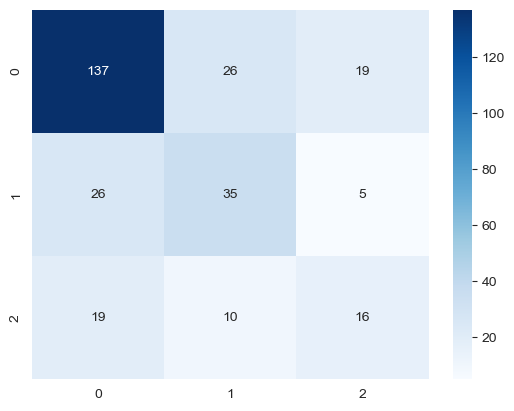

In [19]:
from sklearn.metrics import confusion_matrix
import seaborn as sns; import matplotlib.pyplot as plt

cm = confusion_matrix(all_targets, all_preds)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.show()

In [21]:
import os
import numpy as np
import torch
from torch.utils.data import DataLoader, Subset

# Load eval labels
with open(os.path.join(args.dataset_args.root_folder, "eval_label.pkl"), "rb") as f:
    eval_labels = pickle.load(f)

# Extract clip names
clip_names_eval = [name for _, name in eval_labels]

# Area mapping must match your feeder and reader
AREA_REGEX = {
    "hundido": r"hundidocam\d+",
    "columpios": r"(columpios[_]?cam\d+|columpios_tierra)"
}

def get_area(name):
    import re
    if re.search(AREA_REGEX["hundido"], name):
        return "hundido"
    if re.search(AREA_REGEX["columpios"], name):
        return "columpios"
    return "unknown"

area_to_id = {"hundido": 0, "columpios": 1, "unknown": 2}

for area_name, area_id in area_to_id.items():

    # Find all clips in this area
    indices = [i for i, name in enumerate(clip_names_eval)
               if get_area(name) == area_name]

    if not indices:
        print(area_name, "→ no samples in eval split")
        continue

    subset = Subset(feeders["eval"], indices)
    loader = DataLoader(subset, batch_size=16)

    preds, targets = [], []

    model.eval()
    with torch.no_grad():
        for d, t, _, a in loader:
            d = d.to(device).float()
            a = a.to(device).long()
            out, _ = model(d, a)
            preds.extend(out.argmax(1).cpu().numpy())
            targets.extend(t.numpy())

    acc = np.mean(np.array(preds) == np.array(targets))
    print(area_name, f"accuracy = {acc:.3f}")

hundido accuracy = 0.000
columpios accuracy = 0.651
unknown → no samples in eval split


In [22]:
data, target, _, area_id = next(iter(eval_loader))
data = data.float().to(device)
area_id = area_id.long().to(device)
out, feats = model(data, area_id)
print("Feature shape:", feats.shape)

/Users/alexeidelgado/miniconda3/lib/python3.12/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


Feature shape: torch.Size([8, 256, 12, 84, 1])


In [23]:
model.eval()
all_feats = []
all_targets = []

with torch.no_grad():
    for data, target, _, area_id in eval_loader:
        data = data.float().to(device)
        area_id = area_id.long().to(device)

        out, feats = model(data, area_id)

        # Global Average Pooling: [B, 256, 12, 84, 1] → [B, 256]
        feats = feats.mean(dim=(2, 3, 4))

        all_feats.append(feats.cpu().numpy())
        all_targets.append(target.numpy())

X = np.concatenate(all_feats, axis=0)   # shape: (N, 256)
y = np.concatenate(all_targets, axis=0)
print("Final feature matrix:", X.shape)

Final feature matrix: (293, 256)


In [24]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca2 = pca.fit_transform(X)

print("Explained variance:", pca.explained_variance_ratio_)

Explained variance: [0.42344394 0.17431171]


In [26]:
pca3 = PCA(n_components=3)
X_pca3 = pca3.fit_transform(X)

print(pca3.explained_variance_ratio_)

[0.42344394 0.17431171 0.08514813]


In [ ]:
# Pool features
X = np.concatenate(all_feats, axis=0)      # (293, 256)
y = np.concatenate(all_targets, axis=0)

# PCA to 20 dims for speed
from sklearn.decomposition import PCA
pca20 = PCA(n_components=20)
X20 = pca20.fit_transform(X)

# CPU-friendly UMAP
import umap
umap_reducer = umap.UMAP(
    n_components=2,
    n_neighbors=15,
    min_dist=0.2,
    metric='euclidean'
)
X_umap = umap_reducer.fit_transform(X20)

# PCA-only 2D
X_pca2 = PCA(n_components=2).fit_transform(X)

# t-SNE on 20 dims
from sklearn.manifold import TSNE
X_tsne = TSNE(n_components=2, perplexity=20).fit_transform(X20)